<a href="https://colab.research.google.com/github/Usermer/LLMs/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RAG**

### Comment fonctionne le RAG ?

Le RAG combine deux étapes principales :

1.  **Récupération (Retrieval)** : Lorsqu'une question est posée à un modèle RAG, il recherche d'abord des informations pertinentes dans une vaste base de données (comme des documents, des articles, des pages web, etc.). Cette base de données est appelée le *corpus* ou *base de connaissances*.

2.  **Génération (Generation)** : Une fois que les informations pertinentes ont été récupérées, elles sont transmises à un modèle de langage (souvent un grand modèle de langage, LLM). Le LLM utilise ensuite ces informations récupérées, en plus de ses propres connaissances préexistantes, pour générer une réponse cohérente et précise.

### Pourquoi utiliser le RAG ?

Le RAG offre plusieurs avantages :

*   **Précision accrue** : En s'appuyant sur des informations vérifiées, le modèle peut fournir des réponses plus factuelles.
*   **Réduction des hallucinations** : Les LLM ont parfois tendance à "halluciner" (inventer des faits). Le RAG aide à réduire ce phénomène.
*   **Transparence** : Il est souvent possible de citer les sources d'où les informations ont été extraites, ce qui rend le processus plus transparent.
*   **Mise à jour facile** : La base de connaissances peut être mise à jour indépendamment du modèle de langage, ce qui permet au modèle de rester pertinent avec des informations récentes.

En résumé, le RAG est un moyen efficace de rendre les modèles de langage plus fiables et utiles pour des tâches qui nécessitent des connaissances spécifiques et à jour.

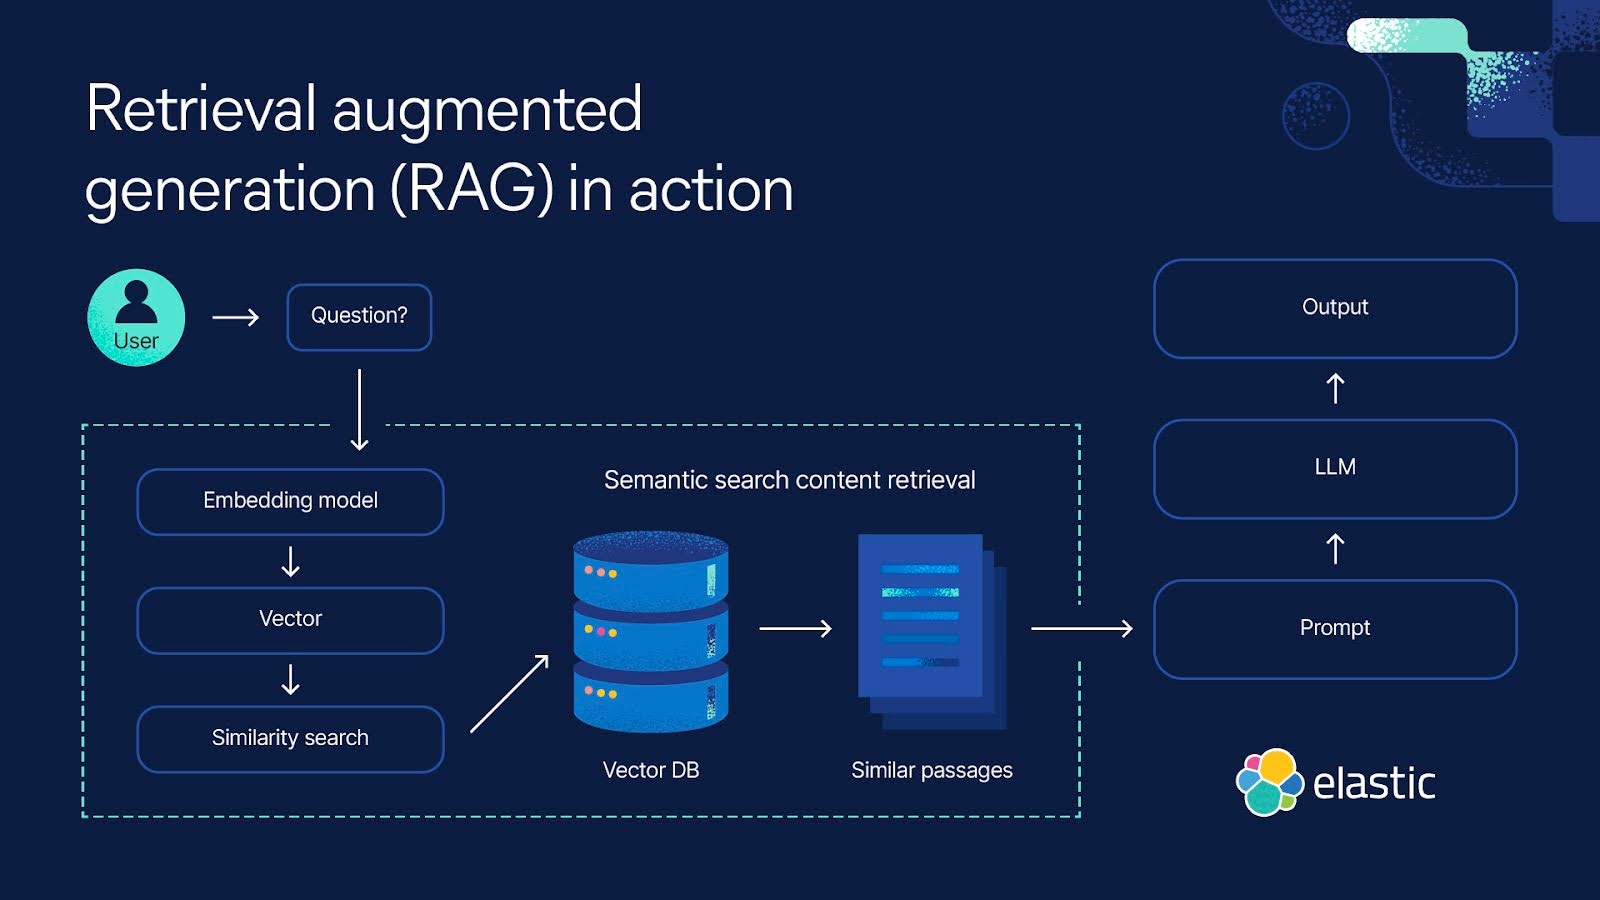

RAG stands for Retrieval Augmented Generation

The goal of RAG is to take information and pass it to an LLM so it can generate outputs based on that information



1.   ***Retrieval***- Find relevant information given a query ,e.g. " What are the macronutrients and what do they do ?->retrieves passages of text related to the macronutrients from a nutrition textbook.
2.   ***Augmented*** - we take the relevant information and augment our input prompt to an LLM with that relevant information


3. ***Generation*** - Take the the first two steps and pass them to an llm for generative outputs.



**Why RAG?**

The main goal of RAG is to improve the generation  outputs of LLMs


1.   **Prevent hallucinations** - LLMs are incredibly  good at generating good looking text , however , this text doesn't mean that it's factual .RAG can help LLms generate information based on relevant passages that are  factual.

2.   **Work with custom data** - Many base LLMs are trained with internaet-scale data. This means they have fairly good undestanding of language in general.



**RAG Pipeline**

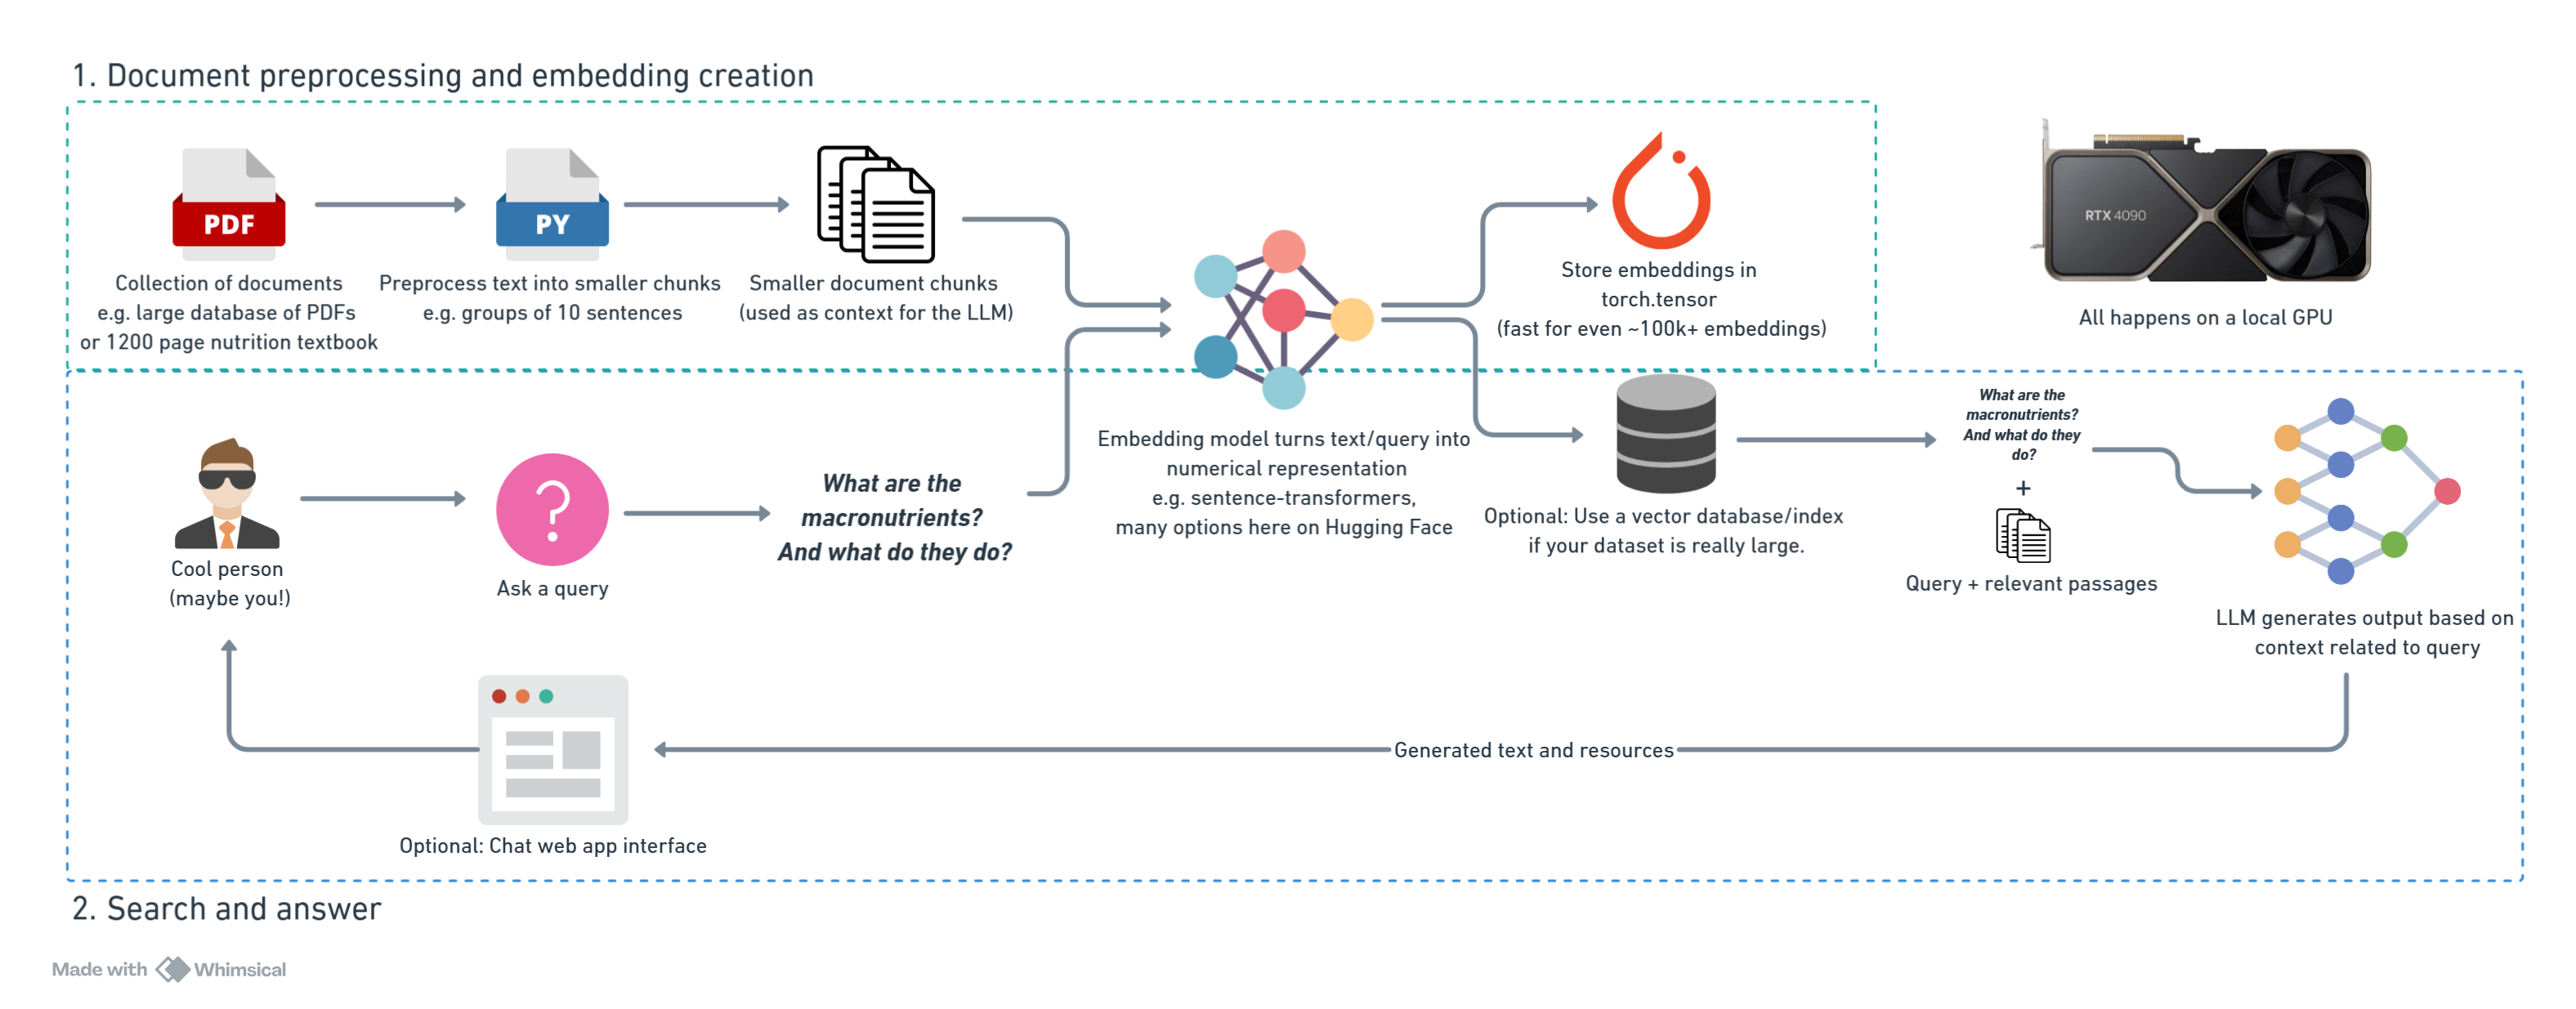

**RAG Key Terms**

| Key Term           | Description                                                                                                                              |
| :----------------- | :--------------------------------------------------------------------------------------------------------------------------------------- |
| **RAG**            | Retrieval-Augmented Generation. An AI framework combining LLMs with a retrieval mechanism.                                              |
| **Retrieval**      | The process of finding relevant information from a knowledge base given a query.                                                         |
| **Augmentation**  | The process of enriching the LLM's input prompt with the retrieved relevant information.                                                  |
| **Generation**     | The LLM's process of producing an output based on the augmented prompt.                                                                  |
| **LLM**            | Large Language Model. The core AI model responsible for generating text.                                                                |
| **Knowledge Base** | A collection of documents, articles, web pages, or other data sources from which information is retrieved. Also called 'corpus'.     |
| **Query**          | The user's input or question for which the RAG system needs to generate a response.                                                      |
| **Embeddings**     | Numerical representations of text that capture semantic meaning, used for efficient retrieval.                                            |
| **Vector Database**| A database optimized for storing and querying vector embeddings, often used in the retrieval step.                                      |
| **Chunking**       | The process of breaking down large documents into smaller, manageable pieces (chunks) for better retrieval.                               |
| **Hallucination**  | When an LLM generates plausible-sounding but factually incorrect information. RAG aims to reduce this.                                 |
| **Custom Data**    | Specific, often private or domain-specific data that LLMs might not have been trained on, which RAG allows the LLM to utilize.         |

1. Open a pdf document
2. Formt the text of the pdf textbook ready for an embedding model.
3. Embeed all of the chuncks of text in the txetbook and turn them intp numerical representations (embeddings) which we can store for later.
4. Build a retrieval system that uses vector search to find relevant chunk of text based on a query.
5. Create a prompt that incorporatets the retrieved pieces of text.
6. Generate an answer to a query based on the passages of the textbook with an LLM

All locally!
1. Steps 1-3:Document processing and embeddings creation.
2. Steps 4-6: Search and answer.

#1.Document/text processing and embedding creation
Ingredients:
* PDF document of choice
* Embedding model of choice

`Steps:`
1. Import PDF document
2. Process text for embedding (e.g. split into chunks of sentences)
3. Embed text chunks with embedding model
4. Save embeddings to file for later


In [ ]:
#!pip install pymupdf

Voici un tableau des chargeurs de documents (***loaders***) courants disponibles dans `langchain_community.document_loaders`

| Loader                   | Description / Fonction                                        | Types de fichiers supportés                   |
| ------------------------ | ------------------------------------------------------------- | --------------------------------------------- |
| `TextLoader`             | Charge un fichier texte simple dans un `Document`             | `.txt`, `.md`                                 |
| `CSVLoader`              | Charge des fichiers CSV et peut mapper les colonnes           | `.csv`                                        |
| `JSONLoader`             | Charge des fichiers JSON, supporte extraction via chemin JSON | `.json`                                       |
| `PDFMinerLoader`         | Charge et extrait le texte depuis des fichiers PDF            | `.pdf`                                        |
| `PyPDFLoader`            | Alternative pour PDF, parfois plus rapide ou précise          | `.pdf`                                        |
| `UnstructuredFileLoader` | Charge tout type de fichier supporté par `unstructured`       | `.txt`, `.pdf`, `.docx`, `.html`, `.md`, etc. |
| `PyMuPDFLoader`          | Loader PDF basé sur PyMuPDF (fitz)                            | `.pdf`                                        |
| `EPubLoader`             | Charge des fichiers ePub                                      | `.epub`                                       |
| `NotionDBLoader`         | Charge le contenu d’une base Notion via API                   | Notion database                               |
| `GoogleDocsLoader`       | Charge un Google Doc via son ID                               | Google Docs                                   |
| `WebBaseLoader`          | Charge une page web à partir d’une URL                        | HTML/Web page                                 |
| `SitemapLoader`          | Charge toutes les pages listées dans un sitemap               | URLs dans sitemap XML                         |
| `PlaywrightURLLoader`    | Charge des pages web dynamiques via Playwright                | HTML dynamiques/JS                            |
